## Transformada

In [1]:
t,s,a = var('t s a')
f = exp(a*t)
L = laplace(f, t, s)
print(L)

-1/(a - s)


## Transformada inversa

In [ ]:
var('s t')
F = 1/(s^2 + 1)
f_t = inverse_laplace(F, s, t)
print(f_t)

sin(t)


## Solver de ecuaciones diferernciales (2do orden)

$ y'' - 3y' - 4y = \sin (x)  \quad y(0) = 1, \quad y'(0) = -1$

In [11]:
def L(y,x):
    return diff(y, x, x) - 3*diff(y, x) - 4*y

In [12]:
var('x s')
y = function('y')(x)
deq = L(y, x) == sin(x)
L_deq = laplace(deq, x, s)
print(L_deq)

s^2*laplace(y(x), x, s) - 3*s*laplace(y(x), x, s) - s*y(0) - 4*laplace(y(x), x, s) + 3*y(0) - D[0](y)(0) == (1/(s^2 + 1))


In [ ]:
# Solve L_deq for Y(s)

Y, a, b = var("Y, a, b")

substitutions = {
    laplace(y, x, s): Y,
    y(x=0): 1, # Condicion inicial para y(0)
    diff(y, x).subs(x==0): -1 # Condición inicial para y'(0)
}

L_algebraic = L_deq.subs(substitutions)

print(L_algebraic)

Y*s^2 - 3*Y*s - 4*Y - s + 4 == (1/(s^2 + 1))


Despeje de la función Y

In [14]:
algebraic_solutions = solve(L_algebraic, Y, solution_dict=True)
print(algebraic_solutions)

[{Y: (s^3 - 4*s^2 + s - 3)/(s^4 - 3*s^3 - 3*s^2 - 3*s - 4)}]


Sagemath puede calcular la inversa sin necesidad de calcular las fracciones parciales con:

In [15]:
y_x = inverse_laplace(algebraic_solutions[0][Y], s, x)
print(y_x)

3/34*cos(x) + 1/85*e^(4*x) + 9/10*e^(-x) - 5/34*sin(x)


Aún así podemos calcular las fracciones parciales con el siguiente método:

In [ ]:
F = algebraic_solutions[0][Y]
F.partial_fraction_decomposition()

Matplotlib is building the font cache; this may take a moment.


[1/34*(3*s - 5)/(s^2 + 1), 9/10/(s + 1), 1/85/(s - 4)]

### Comprobación del resultado

In [17]:
L(y_x, x)

sin(x)

In [23]:
print("y(0) = ", y_x(x=0))

y(0) =  1


In [22]:
print("y'(0) = " , diff(y_x, x).subs(x=0))

y'(0) =  -1


## Ecuaciones simbólicas

$y' + y - 2 = 0 \Longrightarrow y(x) = (k +2e^x) e^{-x}= ke^{-x} +2$

In [3]:
y = function('y')(x)
de = diff(y,x) + y -2
h = desolve(de, y)
print(h)

(_C + 2*e^x)*e^(-x)


In [4]:
expand(h)

_C*e^(-x) + 2

Se pueden añadir las condiciones iniciales y obtenemos la forma general de la función 

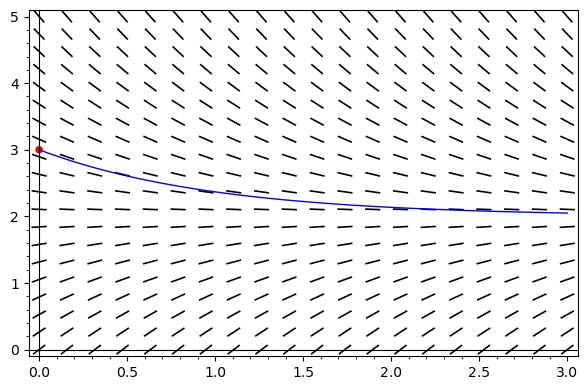

In [12]:
y = var('y') 
Plot1=plot_slope_field(2-y,(x,0,3),(y,0,5))
Plot2=plot(h,x,0,3)
Point=point((0,3),pointsize=30,rgbcolor=(1,0,0))
Plot1+Plot2+Point 

In [13]:
desolvers?

Type:            module
String form:     <module 'sage.calculus.desolvers' from '/usr/lib/python3/dist-packages/sage/calculus/desolvers.py'>
File:            /usr/lib/python3/dist-packages/sage/calculus/desolvers.py
Docstring:      
Solving ordinary differential equations

This file contains functions useful for solving differential equations
which occur commonly in a 1st semester differential equations course.
For another numerical solver see the "ode_solver()" function and the
optional package Octave.

Solutions from the Maxima package can contain the three constants
"_C", "_K1", and "_K2" where the underscore is used to distinguish
them from symbolic variables that the user might have used. You can
substitute values for them, and make them into accessible usable
symbolic variables, for example with "var("_C")".

Commands:

* "desolve()" - Compute the "general solution" to a 1st or 2nd order
  ODE via Maxima.

* "desolve_laplace()" - Solve an ODE using Laplace transforms via
  Maxima

## Soluciones numéricas (Runge Kutta)

In [19]:
y = function('y')(x)
de = diff(y,x) + y -2
h = desolve_rk4(de, y, step=.1, ics=[0,3]) # rk4 devuelve una malla

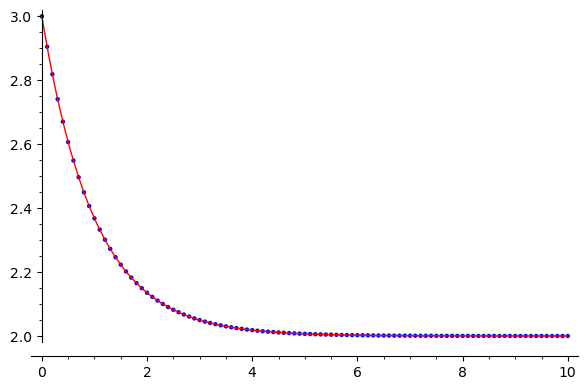

In [24]:
h1 = desolve(de, y, ics=[0,3])
plot(h1,(x,0,10),color='red')+points(h)


## Solución aproximada con series de potencia

In [25]:
R.<t> = PowerSeriesRing(QQ, default_prec=10)
a = -1 + 0*t
b = 2 + 0*t
h=a.solve_linear_de(b=b,f0=3,prec=10)
h

3 - t + 1/2*t^2 - 1/6*t^3 + 1/24*t^4 - 1/120*t^5 + 1/720*t^6 - 1/5040*t^7 + 1/40320*t^8 - 1/362880*t^9 + O(t^10)

In [26]:
h = h.polynomial()
h

-1/362880*t^9 + 1/40320*t^8 - 1/5040*t^7 + 1/720*t^6 - 1/120*t^5 + 1/24*t^4 - 1/6*t^3 + 1/2*t^2 - t + 3

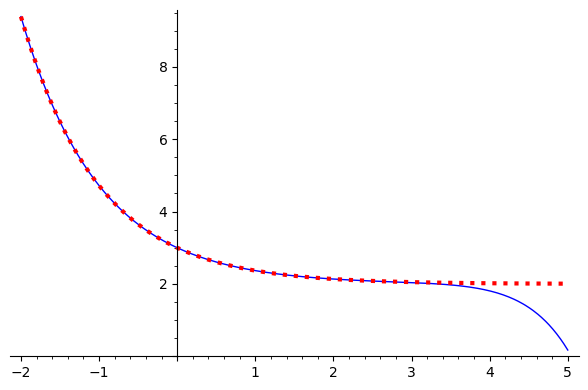

In [27]:
plot(h,-2,5)+plot(2+e^-x,(x,-2,5),color='red',linestyle=':',thickness=3)